In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
data = pd.read_csv("HourlyLondonAirQuality.csv",header=4) # dropping the unwanted rows from top

In [68]:
data.head()

,Date,Time,Nitric oxide,Status,Carbon monoxide,Status.1,PM10 particulate matter (Hourly measured),Status.2,PM2.5 particulate matter (Hourly measured),Status.3
0,7/1/2015,1:00:00,0.43323,V ugm-3,0.397768,V mgm-3,26.9,V ugm-3 (TEOM FDMS),9.2,V ugm-3 (TEOM FDMS)
1,7/1/2015,2:00:00,0.48146,V ugm-3,0.356245,V mgm-3,27.6,V ugm-3 (TEOM FDMS),15.7,V ugm-3 (TEOM FDMS)
2,7/1/2015,3:00:00,0.18086,V ugm-3,0.373126,V mgm-3,31.2,V ugm-3 (TEOM FDMS),17.8,V ugm-3 (TEOM FDMS)
3,7/1/2015,4:00:00,0.28906,V ugm-3,0.378365,V mgm-3,27.1,V ugm-3 (TEOM FDMS),17.3,V ugm-3 (TEOM FDMS)
4,7/1/2015,5:00:00,1.8775,V ugm-3,0.410381,V mgm-3,31,V ugm-3 (TEOM FDMS),18.6,V ugm-3 (TEOM FDMS)


In [69]:
# Removing the unwanted "Status" columns from dataframe
for column in data.columns:
    if "Status" in column:
        data.drop(column, axis=1, inplace=True)

In [70]:
data.head() # verifying the drop of "Status" columns

,Date,Time,Nitric oxide,Carbon monoxide,PM10 particulate matter (Hourly measured),PM2.5 particulate matter (Hourly measured)
0,7/1/2015,1:00:00,0.43323,0.397768,26.9,9.2
1,7/1/2015,2:00:00,0.48146,0.356245,27.6,15.7
2,7/1/2015,3:00:00,0.18086,0.373126,31.2,17.8
3,7/1/2015,4:00:00,0.28906,0.378365,27.1,17.3
4,7/1/2015,5:00:00,1.8775,0.410381,31,18.6


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Date                                        43848 non-null  object
 1   Time                                        43848 non-null  object
 2   Nitric oxide                                43848 non-null  object
 3   Carbon monoxide                             43848 non-null  object
 4   PM10 particulate matter (Hourly measured)   43848 non-null  object
 5   PM2.5 particulate matter (Hourly measured)  43848 non-null  object
dtypes: object(6)
memory usage: 2.0+ MB


### Data cleaning

In [72]:
# Rename long labelled columns
data.rename(columns={"Date": "Date", "Time": "Time", "Nitric oxide": "NO", "Carbon monoxide":"CO", "PM10 particulate matter (Hourly measured)":"PM10", "PM2.5 particulate matter (Hourly measured)":"PM2.5"}, inplace=True)

In [73]:
# Merging the Date and Time columns
data['datetime'] = (pd.to_datetime(data.pop('Date'), format='%m/%d/%Y') + 
                  pd.to_timedelta(data.pop('Time')))

In [74]:
# reset index
data = data.reset_index(drop=True).set_index(pd.DatetimeIndex(data['datetime']))
data.drop("datetime", inplace= True, axis=1)

In [75]:
data.head()

,NO,CO,PM10,PM2.5
datetime,,,,
2015-07-01 01:00:00,0.43323,0.397768,26.9,9.2
2015-07-01 02:00:00,0.48146,0.356245,27.6,15.7
2015-07-01 03:00:00,0.18086,0.373126,31.2,17.8
2015-07-01 04:00:00,0.28906,0.378365,27.1,17.3
2015-07-01 05:00:00,1.8775,0.410381,31,18.6


In [76]:
data.isna().sum() # No NaNs present in the data

NO       0
CO       0
PM10     0
PM2.5    0
dtype: int64

In [77]:
# But we can notice that there are columns with values as "No data", we need to impute those else our series will break

In [78]:
len(data[data["NO"] == "No data"])

350

In [79]:
len(data[data["CO"] == "No data"])

1826

In [80]:
len(data[data["PM10"] == "No data"])

2415

In [81]:
len(data[data["PM2.5"] == "No data"])

1543

In [82]:
# We replace all "No data" values in the dataframe with "NaN" for easy imputation
data = data.replace("No data", np.NaN)

In [83]:
data.isna().sum()

NO        350
CO       1826
PM10     2415
PM2.5    1543
dtype: int64

In [84]:
data.head()

,NO,CO,PM10,PM2.5
datetime,,,,
2015-07-01 01:00:00,0.43323,0.397768,26.9,9.2
2015-07-01 02:00:00,0.48146,0.356245,27.6,15.7
2015-07-01 03:00:00,0.18086,0.373126,31.2,17.8
2015-07-01 04:00:00,0.28906,0.378365,27.1,17.3
2015-07-01 05:00:00,1.8775,0.410381,31,18.6


In [85]:
data.info()  # datatype needs to numeric(float) for all columns except "Time"

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43848 entries, 2015-07-01 01:00:00 to 2020-07-01 00:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NO      43498 non-null  object
 1   CO      42022 non-null  object
 2   PM10    41433 non-null  object
 3   PM2.5   42305 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


#### Converting the column types to numeric

In [86]:
for column in data.columns: 
    #if column != "Time":
        # coerces non-numeric junk to NaNs
        data[column] = pd.to_numeric(data[column], errors='coerce')

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43848 entries, 2015-07-01 01:00:00 to 2020-07-01 00:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NO      43498 non-null  float64
 1   CO      42022 non-null  float64
 2   PM10    41433 non-null  float64
 3   PM2.5   42305 non-null  float64
dtypes: float64(4)
memory usage: 1.7 MB


## EDA

##### As is clearly reflected from below set of graphs,there are multiple outliers. Some more observations are as follows:
a) Also, there isn't much common between the days for which values are missing among the metrics, we can go ahead with imputation of missing without keeping in consideration the common missing days.
<br>b) Clear seasonality in all the metrics with some outliers
<br>c) Trend in CO and NO metrics with some outliers

In [88]:
# Plotting timeseries for each metric across the data points

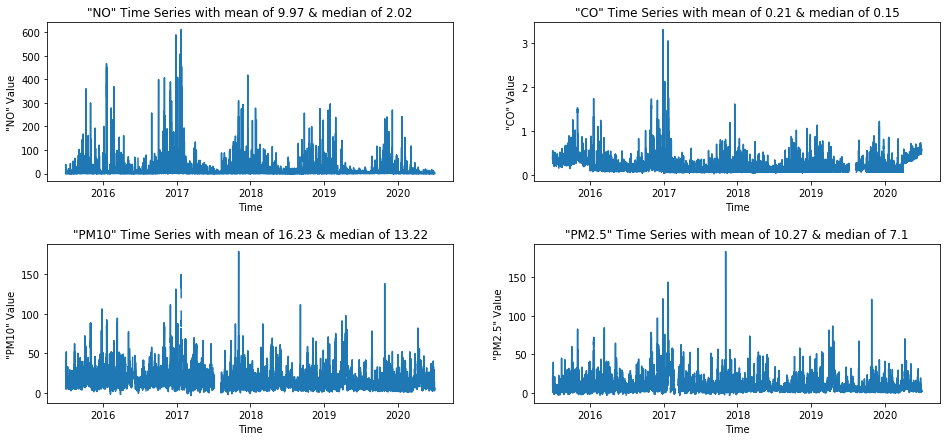

In [89]:
cols = ["NO", "CO", "PM10", "PM2.5"]

fig, axs = plt.subplots(2,2, figsize=(16, 7), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.2)

axs = axs.ravel()

for i, column in enumerate(cols):
        x = data.index
        y = data[column]
        axs[i].plot(x,y)
        axs[i].set_xlabel('Time')
        axs[i].set_ylabel('"'+column+'" Value')
        axs[i].set_title('"'+column+ '" Time Series with mean of '+ str(round(data[column].mean(),2)) + ' & median of '+str(round(data[column].median(),2)))

#### Handling outliers

##### Imputing the missing values using linear interpolation : this is must else we won't be able to calculate outliers because of NaNs

In [90]:
# to interpolate the missing values 
data = data.interpolate(method ='linear', limit_direction ='forward') 

In [91]:
data.isna().sum() # NaNs have been imputed

NO       0
CO       0
PM10     0
PM2.5    0
dtype: int64

In [92]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

for column in data.columns:
    print(column," : ",outlier_treatment(data[column]))

NO  :  (-6.570116250000002, 12.933373750000001)
CO  :  (-0.09906262500000008, 0.4625363750000001)
PM10  :  (-7.250000000000002, 36.35)
PM2.5  :  (-6.366999999999999, 23.064999999999998)


In [93]:
data["month"] = data.index.month
data["hour"] = data.index.hour
data["week_day"] = data.index.dayofweek

In [94]:
data.head()

,NO,CO,PM10,PM2.5,month,hour,week_day
datetime,,,,,,,
2015-07-01 01:00:00,0.43323,0.397768,26.9,9.2,7,1,2
2015-07-01 02:00:00,0.48146,0.356245,27.6,15.7,7,2,2
2015-07-01 03:00:00,0.18086,0.373126,31.2,17.8,7,3,2
2015-07-01 04:00:00,0.28906,0.378365,27.1,17.3,7,4,2
2015-07-01 05:00:00,1.87750,0.410381,31.0,18.6,7,5,2


#### Plot value by day of the week for each metric 

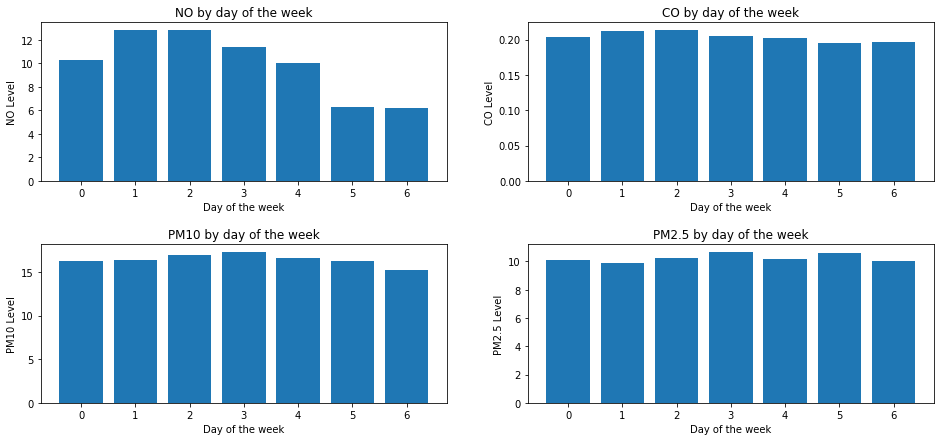

In [95]:
cols = ["NO", "CO", "PM10", "PM2.5"]

fig, axs = plt.subplots(2,2, figsize=(16, 7), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.2)

axs = axs.ravel()

for i, column in enumerate(cols):
#         x = data['week_day']
#         y = data[column]
        axs[i].bar(data[[column, 'week_day']].groupby(['week_day']).mean().index.values, data[[column, 'week_day']].groupby(['week_day']).mean()[column].values)
        axs[i].set_xlabel('Day of the week')
        axs[i].set_ylabel(column+' Level')
        axs[i].set_title(column+ ' by day of the week')

#### Plot by month for each metric

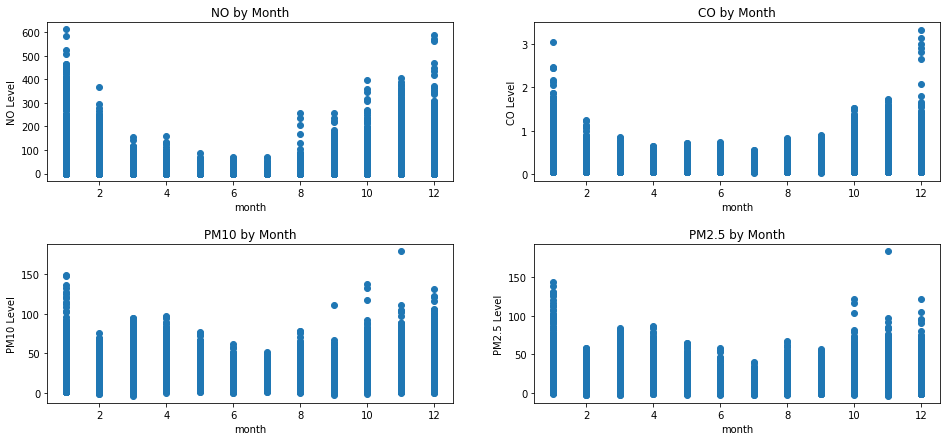

In [96]:
cols = ["NO", "CO", "PM10", "PM2.5"]

fig, axs = plt.subplots(2,2, figsize=(16, 7), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.2)

axs = axs.ravel()

for i, column in enumerate(cols):
        x = data['month']
        y = data[column]
        axs[i].scatter(x,y)
        axs[i].set_xlabel('month')
        axs[i].set_ylabel(column+' Level')
        axs[i].set_title(column+ ' by Month')

#### Plot by hour for each metric

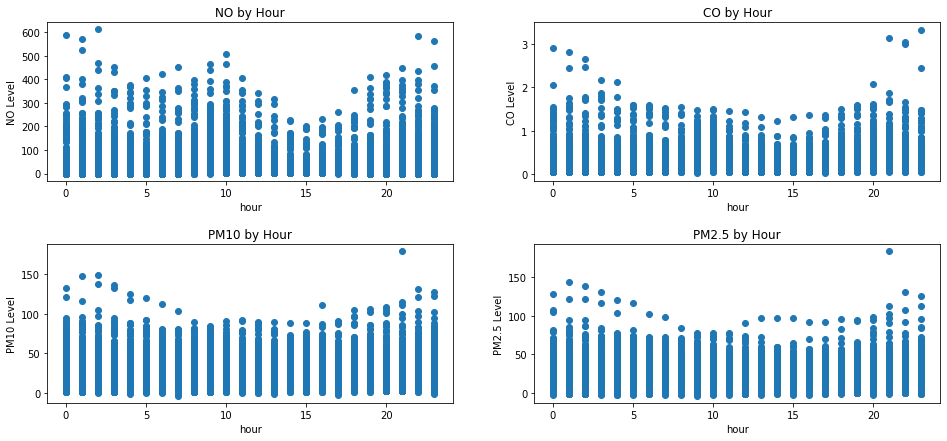

In [97]:
cols = ["NO", "CO", "PM10", "PM2.5"]

fig, axs = plt.subplots(2,2, figsize=(16, 7), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.2)

axs = axs.ravel()

for i, column in enumerate(cols):
        x = data['hour']
        y = data[column]
        axs[i].scatter(x,y)
        axs[i].set_xlabel('hour')
        axs[i].set_ylabel(column+' Level')
        axs[i].set_title(column+ ' by Hour')

In [98]:
data.describe()

,NO,CO,PM10,PM2.5,month,hour,week_day
count,43848.000000,43848.000000,43848.000000,43848.000000,43848.000000,43848.000000,43848.000000
mean,9.961919,0.203920,16.405420,10.241200,6.521073,11.500000,3.000000
std,30.719761,0.154696,11.712949,9.807113,3.449252,6.922265,2.000023
min,-0.311830,0.037307,-3.630000,-3.000000,1.000000,0.000000,0.000000
25%,0.743692,0.111537,9.100000,4.670000,4.000000,5.750000,1.000000
50%,2.040925,0.150182,13.370000,7.168446,7.000000,11.500000,3.000000
75%,5.619565,0.251937,20.000000,12.028000,10.000000,17.250000,5.000000
max,610.796260,3.310694,178.700000,182.800000,12.000000,23.000000,6.000000


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43848 entries, 2015-07-01 01:00:00 to 2020-07-01 00:00:00
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NO        43848 non-null  float64
 1   CO        43848 non-null  float64
 2   PM10      43848 non-null  float64
 3   PM2.5     43848 non-null  float64
 4   month     43848 non-null  int64  
 5   hour      43848 non-null  int64  
 6   week_day  43848 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 2.7 MB


#### Creating separate dataframes for timeseries columns and fabricated columns

In [100]:
data_df = data.copy(deep=True) # storing the copy for avoiding execution from start in case of anything going wrong 
df_external = pd.DataFrame(data_df.index)
df_external = df_external.reset_index(drop=True).set_index(pd.DatetimeIndex(df_external['datetime']))
df_external.drop("datetime", inplace= True, axis=1)
for col in data_df.columns:
    if col in ['month','hour','week_day']:
        df_external[col] = data_df[col].values
        data_df.drop(col, axis=1, inplace=True)

In [101]:
df_external.head()

,month,hour,week_day
datetime,,,
2015-07-01 01:00:00,7,1,2
2015-07-01 02:00:00,7,2,2
2015-07-01 03:00:00,7,3,2
2015-07-01 04:00:00,7,4,2
2015-07-01 05:00:00,7,5,2


In [102]:
### UTILITY FUNCTION FOR CYCLICAL ENCODE VARIABLES

def cycle_encode(data, cols):
    
    for col in cols:
        
        data[col + '_sin'] = np.sin(2 * np.pi * data[col]/data[col].max())
        data[col + '_cos'] = np.cos(2 * np.pi * data[col]/data[col].max())
        
    return data

In [103]:
### BUILD DATAFRAME OF EXTERNAL VARIABLES ###

df_external = cycle_encode(df_external, ['month','hour','week_day'])
df_external.drop(['month','hour','week_day'], axis=1, inplace=True)

print(df_external.shape)
df_external.head()

(43848, 6)


,month_sin,month_cos,hour_sin,hour_cos,week_day_sin,week_day_cos
datetime,,,,,,
2015-07-01 01:00:00,-0.5,-0.866025,0.269797,0.962917,0.866025,-0.5
2015-07-01 02:00:00,-0.5,-0.866025,0.519584,0.854419,0.866025,-0.5
2015-07-01 03:00:00,-0.5,-0.866025,0.730836,0.682553,0.866025,-0.5
2015-07-01 04:00:00,-0.5,-0.866025,0.887885,0.460065,0.866025,-0.5
2015-07-01 05:00:00,-0.5,-0.866025,0.979084,0.203456,0.866025,-0.5


In [104]:
### SPLIT TRAIN TEST ###
date = data_df.index.values
train_date = date[:int(len(data_df)*0.8)]
train = data_df[:int(len(data_df)*0.8)].copy()

test_date = date[int(len(data_df)*0.8):]
test = data_df[int(len(data_df)*0.8):].copy()

print(train.shape, test.shape)

(35078, 4) (8770, 4)


In [105]:
### PLOTTING UTILITY FUNCTIONS ###

def plot_sensor(name):
    
    plt.figure(figsize=(16,4))

    plt.plot(train_date, train[name], label='train')
    plt.plot(test_date, test[name], label='test')
    plt.ylabel(name); plt.legend()
    plt.show()
    
def plot_autocor(name, df):
    
    plt.figure(figsize=(16,4))
    
    # pd.plotting.autocorrelation_plot(df[name])
    # plt.title(name)
    # plt.show()
    
    timeLags = np.arange(1,100*24)
    plt.plot([df[name].autocorr(dt) for dt in timeLags])
    plt.title(name); plt.ylabel('autocorr'); plt.xlabel('time lags')
    plt.show()

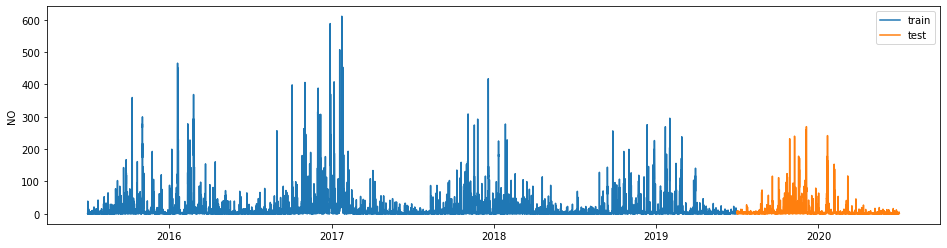

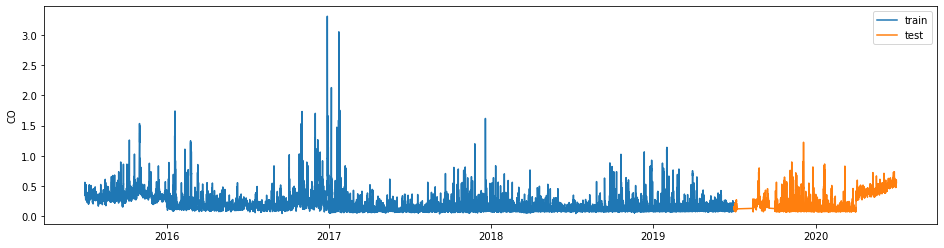

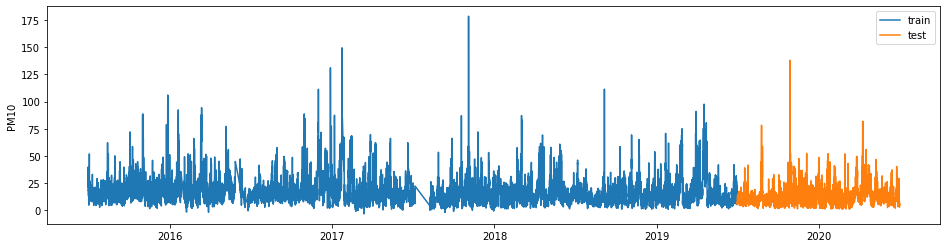

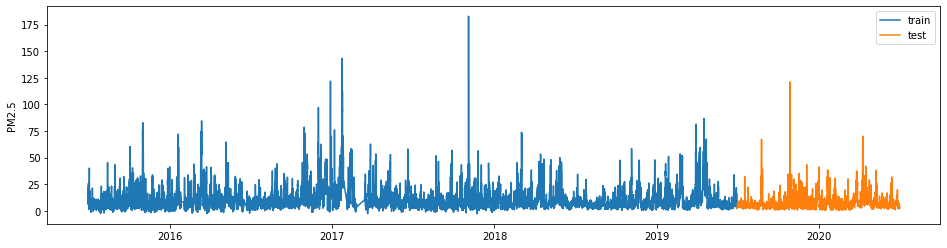

In [106]:
### PLOT ORIGINAL SERIES ###

for col in data_df.columns:
    plot_sensor(col)

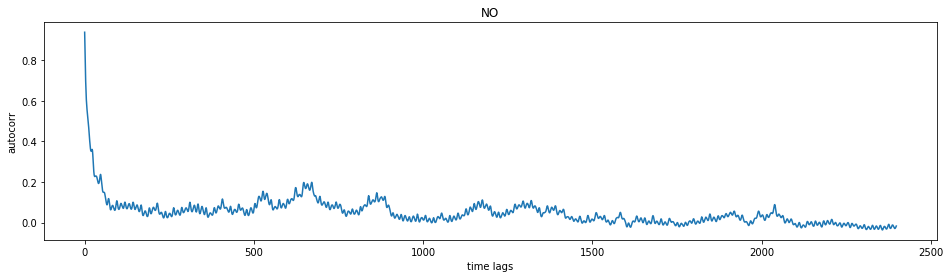

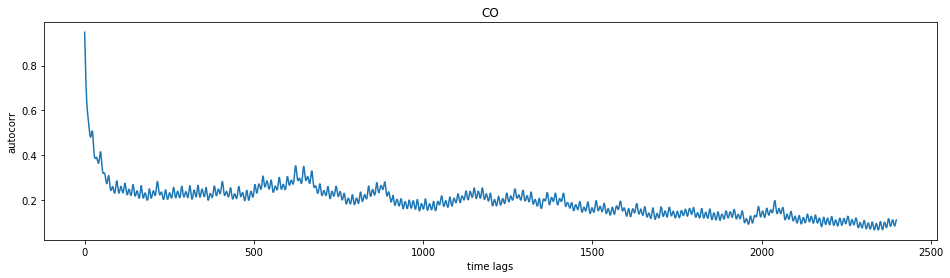

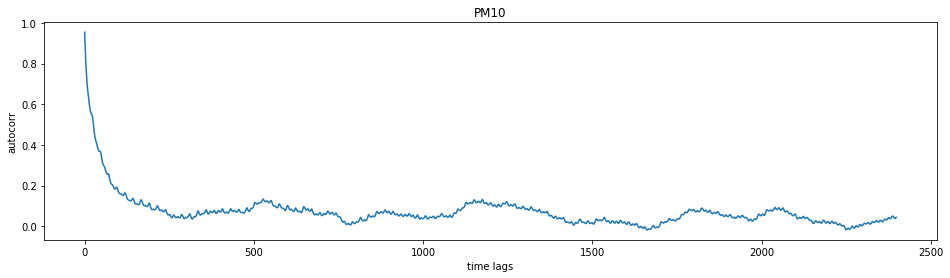

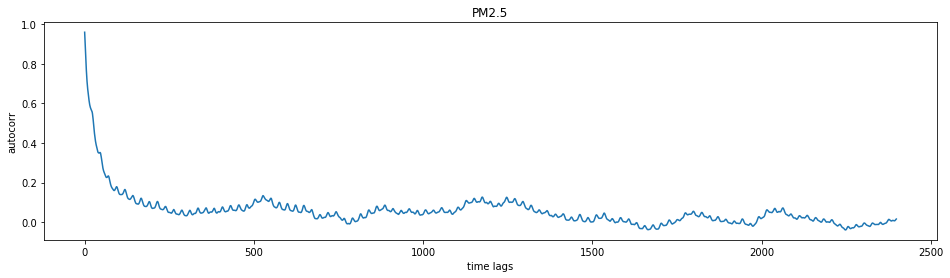

In [107]:
### PLOT AUTOCORRELATION ###

for col in data_df.columns:
    plot_autocor(col, train)

In [108]:
### OPERATE DIFFERENTIATION ###

period = 24*14

df_diff = data_df.diff(period).dropna()
df_external = df_external.iloc[period:].copy()

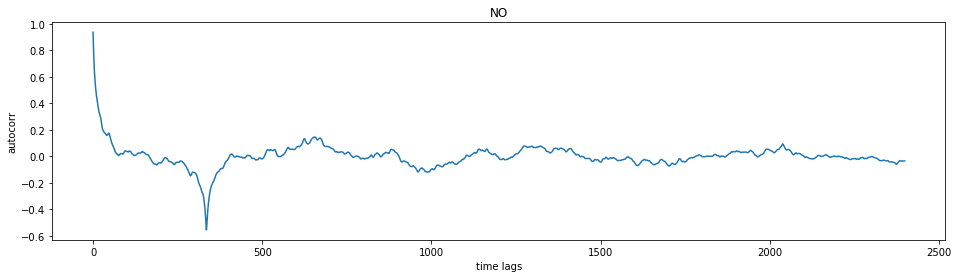

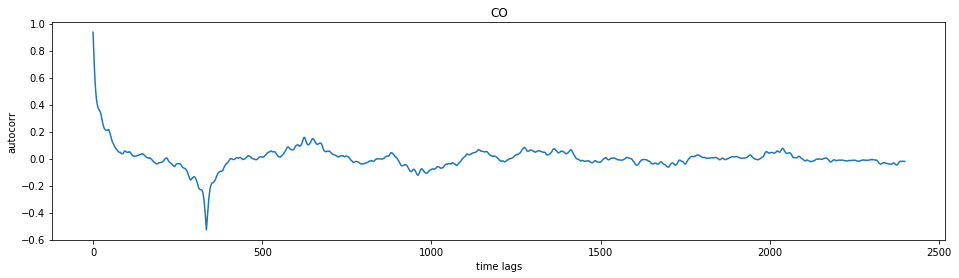

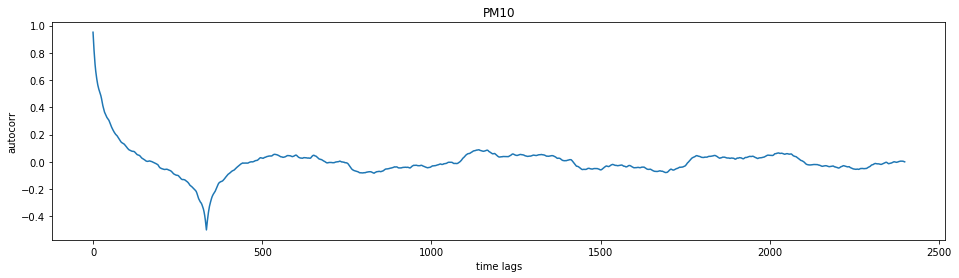

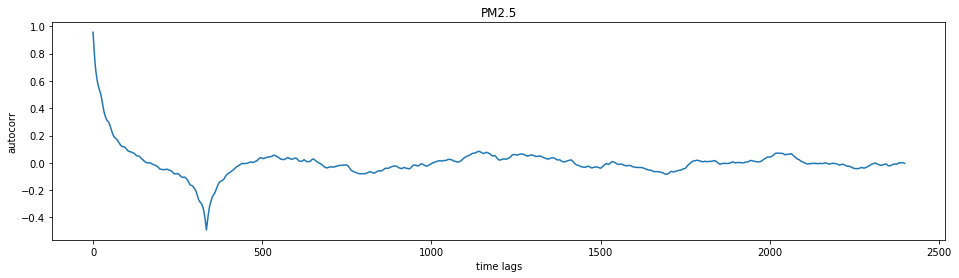

In [109]:
### PLOT AUTOCORRELATION ###

for col in df_diff.columns:
    plot_autocor(col, df_diff)

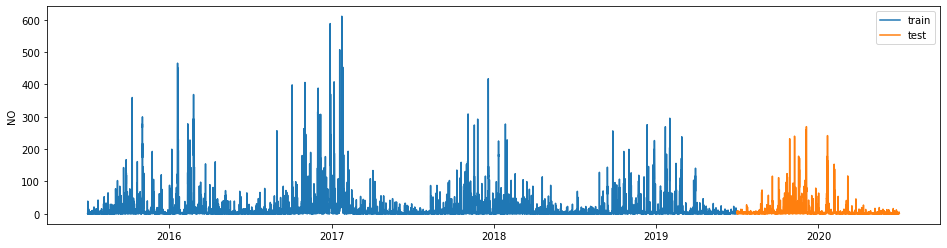

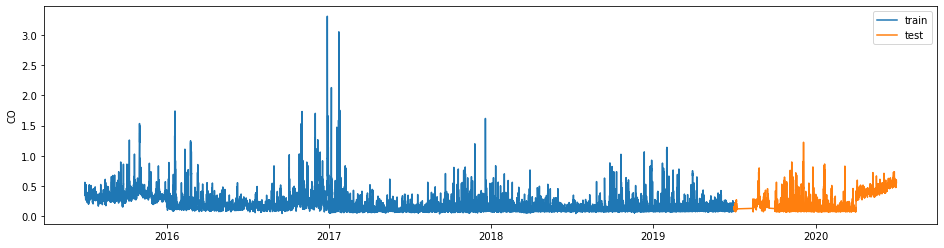

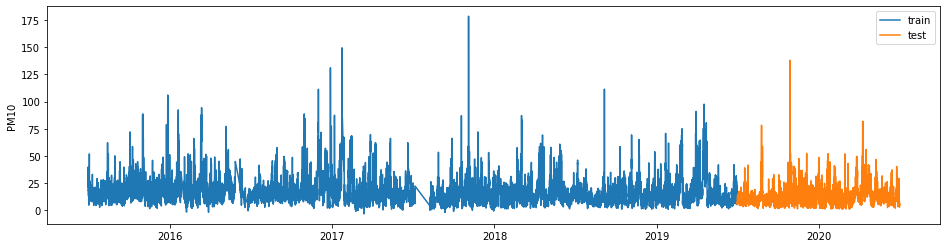

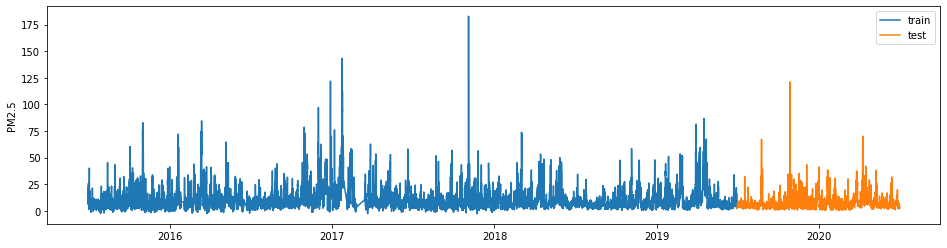

In [110]:
for col in df_diff.columns:
    plot_sensor(col)

In [111]:
### Running statistical test
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")   

for name, column in data_df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "NO" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -18.8318
 No. Lags Chosen       = 55
 Critical value 1%     = -3.43
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CO" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.9936
 No. Lags Chosen       = 55
 Critical value 1%     = -3.43
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PM10" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 T

In [112]:
df_diff.shape, df_external.shape

((43512, 4), (43512, 6))

In [113]:
### SPLIT DIFFERENTIAL DATA IN TRAIN AND TEST ###

train_diff = df_diff.iloc[:len(train)-period,:].copy()
test_diff = df_diff.iloc[len(train)-period:,:].copy()

train_init = data_df.iloc[:len(train)-period,:].copy()
test_init = data_df.iloc[len(train)-period:-period,:].copy()

train_ext = df_external.iloc[:len(train)-period,:].copy()
test_ext = df_external.iloc[len(train)-period:,:].copy()

print(train_diff.shape, train_init.shape, train_ext.shape)
print(test_diff.shape, test_init.shape, test_ext.shape)

(34742, 4) (34742, 4) (34742, 6)
(8770, 4) (8770, 4) (8770, 6)


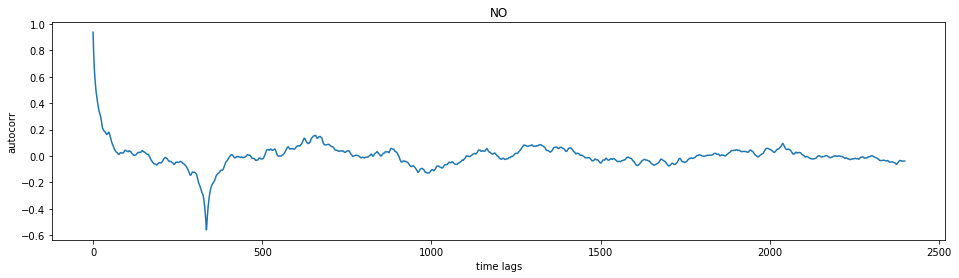

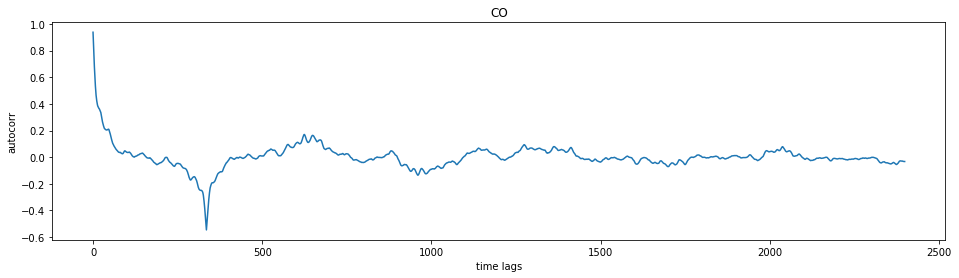

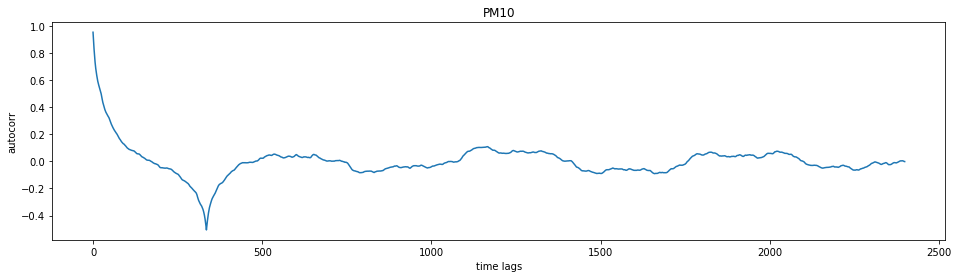

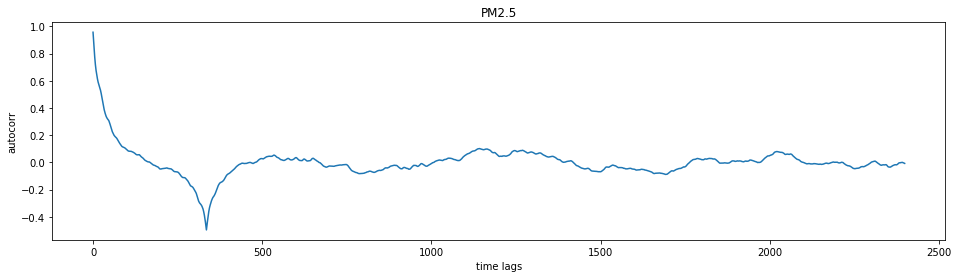

In [114]:

### PLOT DIFFERENTIAL SERIES ###

for col in data_df.columns:
    plot_autocor(col, train_diff)

In [115]:
from statsmodels.tsa.vector_ar.var_model import VAR
### FIND BEST VAR ORDER ###

AIC = {}
best_aic, best_order = np.inf, 0

for i in range(1,50):
    model = VAR(endog=train_diff.values)
    model_result = model.fit(maxlags=i)
    AIC[i] = model_result.aic
    
    if AIC[i] < best_aic:
        best_aic = AIC[i]
        best_order = i
        
print('BEST ORDER', best_order, 'BEST AIC:', best_aic)

BEST ORDER 49 BEST AIC: 4.39080087284274


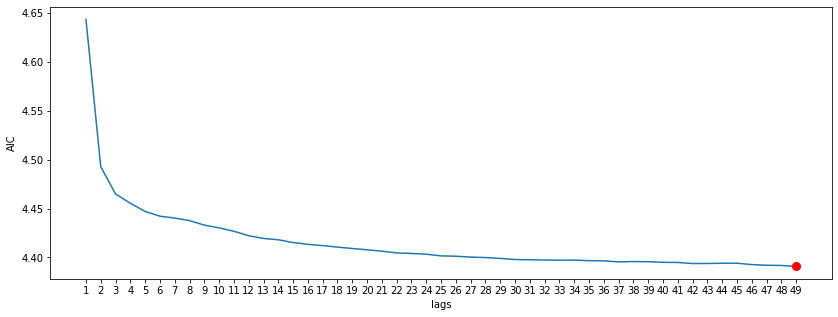

In [116]:
### PLOT AICs ### 

plt.figure(figsize=(14,5))
plt.plot(range(len(AIC)), list(AIC.values()))
plt.plot([best_order-1], [best_aic], marker='o', markersize=8, color="red")
plt.xticks(range(len(AIC)), range(1,50))
plt.xlabel('lags'); plt.ylabel('AIC')
np.set_printoptions(False)

In [125]:
### FIT FINAL VAR WITH LAG CORRESPONTING TO THE BEST AIC ###

var = VAR(endog=train_diff.values)
var_result = var.fit(maxlags=best_order)
var_result.aic

4.39080087284274

In [126]:
### UTILITY FUNCTION FOR RETRIVE VAR PREDICTIONS ###

def retrive_prediction(prior, prior_init, steps):
    
    pred = var_result.forecast(np.asarray(prior), steps=steps)
    init = prior_init.tail(period).values
    
    if steps > period:
        id_period = list(range(period))*(steps//period)
        id_period = id_period + list(range(steps-len(id_period)))
    else:
        id_period = list(range(steps))
    
    final_pred = np.zeros((steps, prior.shape[1]))
    for j, (i,p) in enumerate(zip(id_period, pred)):
        final_pred[j] = init[i]+p
        init[i] = init[i]+p    
        
    return final_pred

In [127]:
### RETRIVE PREDICTION AND OBTAIN THE CORRESPONDING ACTUAL VALUES ###

date = '2020-04-01 14:00:00'
forward = 1000 #next hours of prediction(5 days)
date_range = pd.date_range(date, periods=forward+1, freq='H', closed='right')

final_pred = retrive_prediction(df_diff.loc[:date], data_df.loc[:date], steps = forward)
final_true = data_df.loc[date_range]

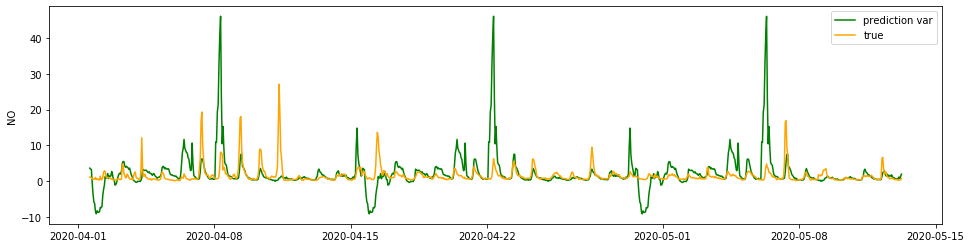

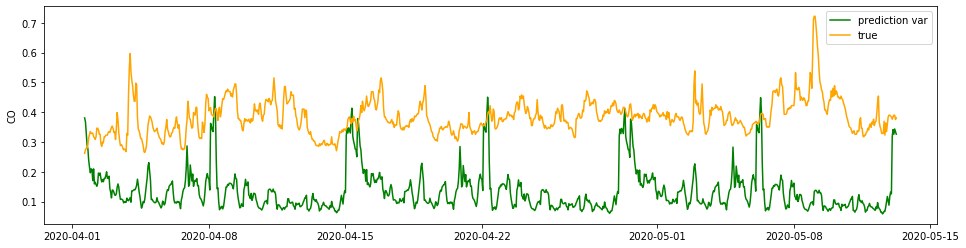

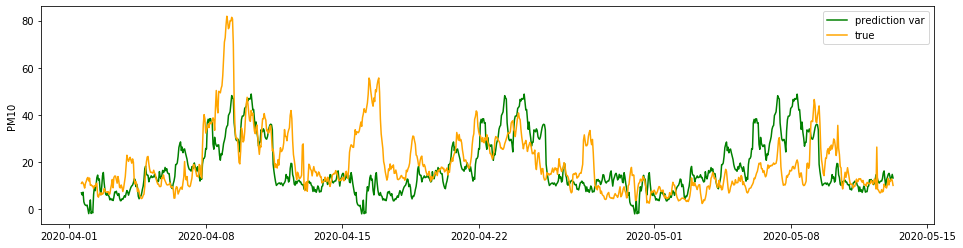

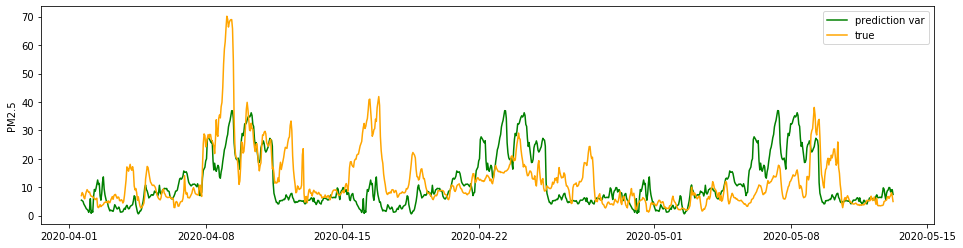

In [128]:
### PLOT ACTUAL vs PREDICTION ###

for i,col in enumerate(data_df.columns):

    plt.figure(figsize=(16,4))
    plt.plot(date_range, final_pred[:,i], c='green', label='prediction var')
    plt.plot(date_range, final_true[col].values, c='orange', label='true')
    plt.ylabel(col); plt.legend()
    plt.show()

### COMBINE VAR AND LSTM

In [129]:
from scipy.stats import pearsonr
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import load_model

import os, random
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [130]:
### UTILITY FUNCTIONS FOR NEURAL NETWORK TRAINING ###

def autocor_pred(real, pred, lag=1):
    return pearsonr(real[:-lag], pred[lag:])[0]


seq_length = 30
n_features = 10

def get_model():
    
    opt = RMSprop(lr=0.002)
    
    inp = Input(shape=(seq_length, n_features))
    
    x = Bidirectional(LSTM(64))(inp)
    x = Dropout(0.5)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    out = Dense(4)(x)
    
    model = Model(inp, out)
    model.compile(optimizer=opt, loss='mse')
    
    return model

In [131]:
### GET TRAIN VALIDATION AND TEST DATA FOR NEURAL NETWORK ###

X = var_result.fittedvalues

y_train = train.iloc[period+best_order:].values
y_train_var = X + train_init.iloc[best_order:].values
X_train = np.concatenate([train_diff.iloc[best_order:].values, train_ext.iloc[best_order:].values], axis=1)
X_train_var = np.concatenate([X, train_ext.iloc[best_order:].values], axis=1)

y_val = y_train[int(len(X)*0.8):]
y_val_var = y_train_var[int(len(X)*0.8):]
X_val = X_train[int(len(X)*0.8):]
X_val_var = X_train_var[int(len(X)*0.8):]

y_train = y_train[:int(len(X)*0.8)]
y_train_var = y_train_var[:int(len(X)*0.8)]
X_train = X_train[:int(len(X)*0.8)]
X_train_var = X_train_var[:int(len(X)*0.8)]

y_test = test.values
X_test = np.concatenate([test_diff.values, test_ext.values], axis=1)

In [132]:
print("test: (X,y) = ", X_test.shape, y_test.shape)
print("train: (X,y) = ", X_train.shape, y_train.shape)
print("Val: (X,y) = ", X_val.shape, y_val.shape)

test: (X,y) =  (8770, 10) (8770, 4)
train: (X,y) =  (27754, 10) (27754, 4)
Val: (X,y) =  (6939, 10) (6939, 4)


In [133]:
### SCALE DATA ###

scaler_y = StandardScaler()
scaler = StandardScaler()

y_train = scaler_y.fit_transform(y_train)
y_train_var = scaler_y.transform(y_train_var)
y_val = scaler_y.transform(y_val)
y_val_var = scaler_y.transform(y_val_var)
y_test = scaler_y.transform(y_test)

X_train = scaler.fit_transform(X_train)
X_train_var = scaler.transform(X_train_var)
X_val = scaler.transform(X_val)
X_val_var = scaler.transform(X_val_var)
X_test = scaler.transform(X_test)

In [134]:
### BUILD DATA GENERATOR ###

generator_train = TimeseriesGenerator(X_train, y_train, length=seq_length, batch_size=32)
generator_train_var = TimeseriesGenerator(X_train_var, y_train_var, length=seq_length, batch_size=32)
generator_val = TimeseriesGenerator(X_val, y_val, length=seq_length, batch_size=32)
generator_val_var = TimeseriesGenerator(X_val_var, y_val_var, length=seq_length, batch_size=32)
generator_test = TimeseriesGenerator(X_test, y_test, length=seq_length, batch_size=32)

In [135]:
### FIT NEURAL NETWORK WITH VAR FITTED VALUES AND RAW DATA ###

tf.random.set_seed(33)
os.environ['PYTHONHASHSEED'] = str(33)
np.random.seed(33)
random.seed(33)

session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1, 
    inter_op_parallelism_threads=1
)
sess = tf.compat.v1.Session(
    graph=tf.compat.v1.get_default_graph(), 
    config=session_conf
)
tf.compat.v1.keras.backend.set_session(sess)


es = EarlyStopping(patience=5, verbose=1, min_delta=0.001, monitor='val_loss', mode='auto', restore_best_weights=True)

print('--------', 'train model with VAR fitted values', '--------')
model_var = get_model()
model_var.fit_generator(generator_train_var, steps_per_epoch= len(generator_train_var),
                        epochs=100, validation_data=generator_val_var, validation_steps = len(generator_val_var), 
                        callbacks=[es], verbose = 1)


print('--------', 'train model with raw data', '--------')
model_var.fit_generator(generator_train, steps_per_epoch= len(generator_train),
                        epochs=100, validation_data=generator_val, validation_steps = len(generator_val), 
                        callbacks=[es], verbose = 1)

-------- train model with VAR fitted values --------
Epoch 1/100
867/867 [==============================] - 120s 138ms/step - loss: 0.6537 - val_loss: 0.3304
Epoch 2/100
867/867 [==============================] - 132s 152ms/step - loss: 0.4943 - val_loss: 0.3061
Epoch 3/100
867/867 [==============================] - 133s 154ms/step - loss: 0.4608 - val_loss: 0.3121
Epoch 4/100
867/867 [==============================] - 141s 163ms/step - loss: 0.4511 - val_loss: 0.3315
Epoch 5/100
867/867 [==============================] - 115s 133ms/step - loss: 0.4332 - val_loss: 0.2955
Epoch 6/100
867/867 [==============================] - 118s 136ms/step - loss: 0.4226 - val_loss: 0.2913
Epoch 7/100
867/867 [==============================] - 118s 137ms/step - loss: 0.4123 - val_loss: 0.3106
Epoch 8/100
867/867 [==============================] - 115s 132ms/step - loss: 0.4180 - val_loss: 0.3006
Epoch 9/100
867/867 [==============================] - 128s 147ms/step - loss: 0.4090 - val_loss: 0.2738
Ep

In [473]:
#model_var.save("Var_LSTMModel.h5")

In [136]:
### OBTAIN PREDICTIONS AND RETRIVE ORIGINAL DATA ###

true = scaler_y.inverse_transform(y_test[seq_length:])

pred = model_var.predict_generator(generator_test)
pred = scaler_y.inverse_transform(pred)

In [465]:
### FIT NEURAL NETWORK WITH ONLY ORIGINAL DATA ###

tf.random.set_seed(33)
os.environ['PYTHONHASHSEED'] = str(33)
np.random.seed(33)
random.seed(33)

session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1, 
    inter_op_parallelism_threads=1
)
sess = tf.compat.v1.Session(
    graph=tf.compat.v1.get_default_graph(), 
    config=session_conf
)
tf.compat.v1.keras.backend.set_session(sess)


es = EarlyStopping(patience=5, verbose=1, min_delta=0.001, monitor='val_loss', mode='auto', restore_best_weights=True)

simple_model = get_model()
simple_model.fit_generator(generator_train, steps_per_epoch= len(generator_train),
                            epochs=100, validation_data=generator_val, validation_steps = len(generator_val), 
                            callbacks=[es], verbose = 1)

Epoch 1/100
873/873 [==============================] - 69s 79ms/step - loss: 0.5464 - val_loss: 0.3324
Epoch 2/100
873/873 [==============================] - 74s 85ms/step - loss: 0.4408 - val_loss: 0.2918
Epoch 3/100
873/873 [==============================] - 67s 77ms/step - loss: 0.4086 - val_loss: 0.2914
Epoch 4/100
873/873 [==============================] - 67s 77ms/step - loss: 0.3800 - val_loss: 0.2649
Epoch 5/100
873/873 [==============================] - 65s 75ms/step - loss: 0.3711 - val_loss: 0.3014
Epoch 6/100
873/873 [==============================] - 68s 78ms/step - loss: 0.3652 - val_loss: 0.2666
Epoch 7/100
873/873 [==============================] - 71s 81ms/step - loss: 0.3527 - val_loss: 0.2773
Epoch 8/100
873/873 [==============================] - 66s 76ms/step - loss: 0.3792 - val_loss: 0.2741
Epoch 9/100
873/873 [==============================] - 66s 76ms/step - loss: 0.3503 - val_loss: 0.2564
Epoch 10/100
873/873 [==============================] - 66s 76ms/step - l

In [474]:
simple_model.save("SimpleLSTMModel.h5")

In [466]:
### OBTAIN PREDICTIONS ###

pred_simple = simple_model.predict_generator(generator_test)
pred_simple = scaler_y.inverse_transform(pred_simple)

In [468]:
### COMPUTE METRICS ON TEST DATA ###

diz_error_lstm, diz_ac_lstm = {}, {}
diz_error_var_lstm, diz_ac_var_lstm = {}, {}


for i,col in enumerate(data_df.columns):
    
    error = mean_absolute_error(true[:,i], pred_simple[:,i])
    diz_error_lstm[col] = error
    
    error = mean_absolute_error(true[:,i], pred[:,i])
    diz_error_var_lstm[col] = error
    
    ac = autocor_pred(true[:,i], pred_simple[:,i])
    diz_ac_lstm[col] = ac
    
    ac = autocor_pred(true[:,i], pred[:,i])
    diz_ac_var_lstm[col] = ac

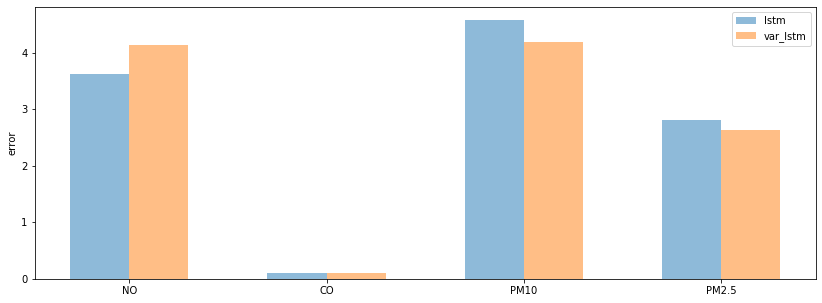

In [469]:
plt.figure(figsize=(14,5))
plt.bar(np.arange(len(diz_error_lstm))-0.15, diz_error_lstm.values(), alpha=0.5, width=0.3, label='lstm')
plt.bar(np.arange(len(diz_error_var_lstm))+0.15, diz_error_var_lstm.values(), alpha=0.5, width=0.3, label='var_lstm')
plt.xticks(range(len(diz_error_lstm)), diz_error_lstm.keys())
plt.ylabel('error'); plt.legend()
np.set_printoptions(False)

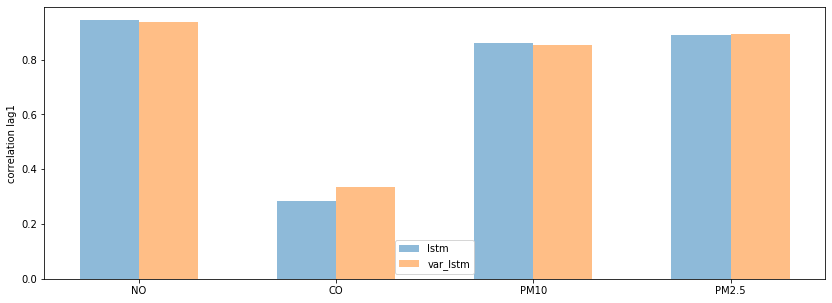

In [470]:
plt.figure(figsize=(14,5))
plt.bar(np.arange(len(diz_ac_lstm))-0.15, diz_ac_lstm.values(), alpha=0.5, width=0.3, label='lstm')
plt.bar(np.arange(len(diz_ac_var_lstm))+0.15, diz_ac_var_lstm.values(), alpha=0.5, width=0.3, label='var_lstm')
plt.xticks(range(len(diz_ac_lstm)), diz_ac_lstm.keys())
plt.ylabel('correlation lag1'); plt.legend()
np.set_printoptions(False)

In [ ]:
# Generate Prediction for unseen data using the final saved model
# Accept threshold metrics from the user to flag the results


# Check the stats using : https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/ 
# and get rid of non-stationarity from the data
# Improve the results by removing outliers and then retrain the models
# Use Bidirectional LSTM


In [482]:
# Create future 24*3 hours for 3 days prediction

In [ ]:
# Generate future datetime-hour data and create values for month, hour and week_day features with sine, cosine cyclic manipulations
# Now apply scaling on the data
# Now apply the data to 

### Train on complete data for final model and save it for prediction

In [542]:
df_diff.shape,df_external.shape

((43776, 4), (43776, 6))

In [543]:
complete_train = np.concatenate([df_diff.values, df_external.values], axis=1)

In [544]:
complete_y_train = scaler_y.transform(df_diff.values)

complete_X_train = scaler.fit_transform(complete_train)

In [546]:
generator_complete_train = TimeseriesGenerator(complete_X_train, complete_y_train, length=seq_length, batch_size=32)

In [548]:
es = EarlyStopping(patience=5, verbose=1, min_delta=0.001, monitor='loss', mode='auto', restore_best_weights=True)

simple_model = get_model()
simple_model.fit_generator(generator_complete_train, steps_per_epoch= len(generator_complete_train),
                            epochs=100, callbacks=[es], verbose = 1)

Epoch 1/100
1368/1368 [==============================] - 167s 122ms/step - loss: 0.5942
Epoch 2/100
1368/1368 [==============================] - 172s 126ms/step - loss: 0.4030
Epoch 3/100
 858/1368 [=================>............] - ETA: 1:03 - loss: 0.3976

KeyboardInterrupt: 

### Prediction on unseen future data

##### Generating future feature set for prediction

In [730]:
from pandas.tseries.offsets import DateOffset

In [739]:
def generate_features(orig_data_df, seq_length):
    """
    orig_data_df: the original dataframe with datetime index and the last value will be used to generate future date and time
    seq_length: The number of values that will be generated for data to be predicted, this should be similar to - 
                the input of model
                
    """    
    
    date = orig_data_df.index[-1] # get the last date for which the data is available, after that the prediction will 
            # be made for next  set of seq_length items
    # generate next seq_length number of datetime values for hours
    date_range = pd.date_range(date, periods=seq_length+1, freq='H', closed='right')
    
    data = pd.DataFrame(index=date_range,columns=orig_data_df.columns)
    data["month"] = data.index.month
    data["hour"] = data.index.hour
    data["week_day"] = data.index.dayofweek
    
    data = cycle_encode(data, ['month','hour','week_day'])  # Generate acyclic features just like at the training
    data.drop(['month','hour','week_day'], axis=1, inplace=True)  # remove the original month, hour, week_day columns
    
    # reset index to default to allow easy iteration during the next step of assisning values as predicted for each hour
    data.reset_index(inplace=True)
    datetime_col = data["index"].values # store the value datetime index, we will append this back post prediction
    data.drop("index", axis=1, inplace=True)
    
    return data, datetime_col

In [779]:
def predict_future(n_features, seq_length, orig_data, path_to_trained_model):
    """
    n_features: No. of features that exist in the dataframe and were passed to the model as input while being trained
    seq_length: No. of items to be predicted, this value also depends on the model input
    data: dataframe with the most recent prediction or initial values to extract the most recent seq_length no. of items
    complete_train: a numpy array of 
    path_to_trained_model: the path to saved model(h5 file)
    """
    data, datetime_col = generate_features(orig_data, seq_length)
    
    model = load_model(path_to_trained_model)  # load trained model
    pred_list = [] # to store the prediction for each hour
    batch = orig_data.values[-seq_length:].reshape((1, seq_length, n_features))  
    for i in range(seq_length):
        #reverse scales the predicted values as the rest of the features(month, hour, weekday based) are not scaled
        pred_list.append(scaler_y.inverse_transform(model.predict(batch)[0])) 
        
        # assign values to the individual columns from predicted set of items
        data.at[i, "NO"] = pred_list[i][0]
        data.at[i, "CO"] = pred_list[i][1]
        data.at[i, "PM10"] = pred_list[i][2]
        data.at[i, "PM2.5"] = pred_list[i][3]

        # pick the recent most (seq_length -1) items from the batch and append the predicted one to the last
        # we will use this updated batch to predict the next item
        batch = np.append(batch[:,1:,:],[[(data.iloc[i].values).tolist()]],axis=1)
        
        
    # reset index to "datetime" column saved earlier for interpretation and plotting of data
    data["datetime"] = datetime_col
    data = data.reset_index(drop=True).set_index(pd.DatetimeIndex(data['datetime']))
    data.drop("datetime", inplace= True, axis=1)

    # Generate prediction
    output_values = data[["NO", "CO", "PM10", "PM2.5"]].values  # Generating the final set of values predicted
    final_prediction_df = pd.DataFrame(data = output_values, columns= ["NO", "CO", "PM10", "PM2.5"], index= data.index)
    return final_prediction_df # returning the final dataframe of predicted values

In [780]:
path_to_trained_model = "SimpleLSTMModel.h5"

In [784]:
complete_df = pd.concat([df_diff, df_external], axis=1)  # generating the complete input dataframe with input features 
                                                        # and engineered features 

In [785]:
# total number of features = n_features as included in the input data to model
final_pred = predict_future(n_features, seq_length, complete_df, path_to_trained_model)

In [786]:
final_pred

,NO,CO,PM10,PM2.5
datetime,,,,
2020-07-01 01:00:00,5.53043,0.184556,15.6119,8.50541
2020-07-01 02:00:00,67.4384,0.533156,73.8807,62.2541
2020-07-01 03:00:00,223.121,1.09489,94.1435,79.4387
2020-07-01 04:00:00,297.049,1.31809,80.9117,67.4179
2020-07-01 05:00:00,308.723,1.35137,72.9027,59.8503
2020-07-01 06:00:00,313.832,1.37199,69.2948,56.835
2020-07-01 07:00:00,319.959,1.39026,69.2928,56.7718
2020-07-01 08:00:00,322.799,1.39393,69.0254,56.4424
2020-07-01 09:00:00,323.674,1.38378,67.6761,55.0368
